In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load all the datasets
df_2010 = pd.read_csv('/content/drive/My Drive/CSE545/Project/blockgroup2010.csv')
df_2011 = pd.read_csv('/content/drive/My Drive/CSE545/Project/blockgroup2011.csv')
df_2012 = pd.read_csv('/content/drive/My Drive/CSE545/Project/blockgroup2012.csv')
df_2013 = pd.read_csv('/content/drive/My Drive/CSE545/Project/blockgroup2013.csv')
df_2014 = pd.read_csv('/content/drive/My Drive/CSE545/Project/blockgroup2014.csv')
df_2015 = pd.read_csv('/content/drive/My Drive/CSE545/Project/blockgroup2015.csv')
df_2016 = pd.read_csv('/content/drive/My Drive/CSE545/Project/blockgroup2016.csv')
df_2017 = pd.read_csv('/content/drive/My Drive/CSE545/Project/blockgroup2017.csv')
df_2018 = pd.read_csv('/content/drive/My Drive/CSE545/Project/blockgroup2018.csv')

In [0]:
all_data = {'2010': df_2010, '2011': df_2011, '2012': df_2012, '2013': df_2013, '2014': df_2014, '2015': df_2015, '2016': df_2016, '2017': df_2017, '2018': df_2018}

In [0]:
# The following list has all the demographic columns
# columns_to_select = ['geo_id', 'nonfamily_households', 'family_households', 'male_pop', 'female_pop', 'median_age', 'white_pop', 'black_pop', 'asian_pop', 'hispanic_pop', 'amerindian_pop', 'other_race_pop', 'two_or_more_races_pop', 'not_hispanic_pop', 'commuters_by_public_transportation', 'households', 'married_households', 'male_under_5', 'male_5_to_9', 'male_10_to_14', 'male_15_to_17', 'male_18_to_19', 'male_20', 'male_21', 'male_22_to_24', 'male_25_to_29', 'male_30_to_34', 'male_35_to_39', 'male_40_to_44', 'male_45_to_49', 'male_50_to_54', 'male_55_to_59', 'male_60_61', 'male_62_64', 'male_65_to_66', 'male_67_to_69', 'male_70_to_74', 'male_75_to_79', 'male_80_to_84', 'male_85_and_over', 'female_under_5', 'female_5_to_9', 'female_10_to_14', 'female_15_to_17', 'female_18_to_19', 'female_20', 'female_21', 'female_22_to_24', 'female_25_to_29', 'female_30_to_34', 'female_35_to_39', 'female_40_to_44', 'female_45_to_49', 'female_50_to_54', 'female_55_to_59', 'female_60_to_61', 'female_62_to_64', 'female_65_to_66', 'female_67_to_69', 'female_70_to_74', 'female_75_to_79', 'female_80_to_84', 'female_85_and_over', 'white_including_hispanic', 'black_including_hispanic', 'amerindian_including_hispanic', 'asian_including_hispanic']

# The following list has only racial columns
columns_to_select = ['geo_id', 'white_pop', 'black_pop', 'asian_pop', 'hispanic_pop', 'amerindian_pop', 'other_race_pop', 'two_or_more_races_pop', 'total_pop']

In [0]:
# Select subset of columns
df_selected = df_2010[columns_to_select].copy()
# Drop all the rows with NA values
df_selected.dropna(inplace=True)
df_selected.reset_index(drop=True, inplace=True)
# Remove blocks with 0 population
df_selected = df_selected[df_selected.total_pop != 0]

# Calculate percentage of every race in every block. We experimented that
# working on % gives better result than working on raw numbers.
df_selected['white_pop'] = df_selected['white_pop']/df_selected['total_pop']
df_selected['black_pop'] = df_selected['black_pop']/df_selected['total_pop']
df_selected['asian_pop'] = df_selected['asian_pop']/df_selected['total_pop']
df_selected['hispanic_pop'] = df_selected['hispanic_pop']/df_selected['total_pop']
df_selected['amerindian_pop'] = df_selected['amerindian_pop']/df_selected['total_pop']
df_selected['other_race_pop'] = df_selected['other_race_pop']/df_selected['total_pop']
df_selected['two_or_more_races_pop'] = df_selected['two_or_more_races_pop']/df_selected['total_pop']

# Get the GEO_IDs of all the selected rows
geo_ids_selected = df_selected['geo_id']

# Drop the GEO_ID and TOTAL_POP from the dataframe
df_selected.drop('geo_id', axis=1, inplace=True)
df_selected.drop('total_pop', axis=1, inplace=True)

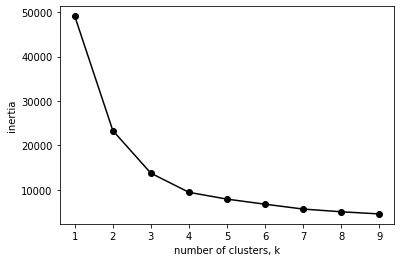

In [6]:
# Here we find the number of clusters based on 'inertia' 
# for different no. clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    model.fit(df_selected)
    inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [7]:
# From the above graph we can see that 4 is a suitable number of clusters
model = KMeans(n_clusters=4)
# Fit model to samples
model.fit(df_selected)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Get the cluster assignments for all the rows in a dataframe 
clusters = pd.DataFrame(model.labels_, columns=['cluster'])

# Add clusters back to the main dataframe
df_selected = pd.concat([df_selected, clusters], axis=1, sort=False) 

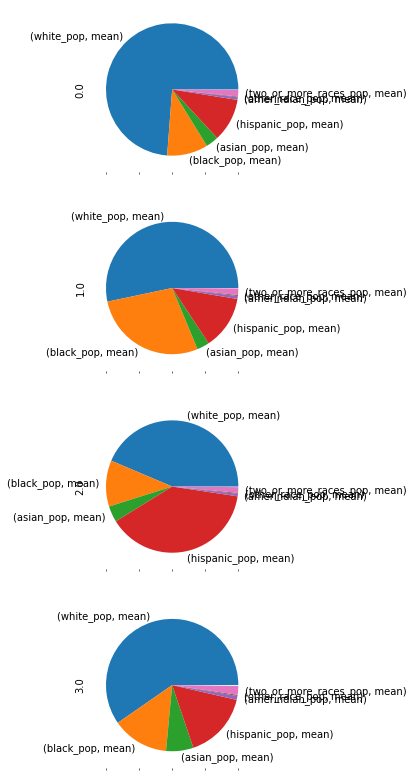

In [9]:
# Let us visualize the distribution of the clusters
df_selected.groupby(['cluster']).agg(['mean']).T.plot(kind='pie', subplots=True, legend=False,layout=(4,1), figsize=(14,14));

In [0]:
geo_ids_selected.reset_index(drop=True, inplace=True)
# Create a dictionary of GEO_IDs to CLUSTER
geo_id_to_cluster = dict(zip(geo_ids_selected.to_list(), clusters['cluster'].tolist())) 
# Add clsuter information to all the dataset
for df in all_data:
    all_data[df]['cluster'] = all_data[df].apply(lambda row: geo_id_to_cluster.get(int(row.geo_id), -1), axis = 1)

### Analyzing median income of different clusters over years
Note: the median income is averaged across all the blocks in a cluster 

In [0]:
median_income_by_year = all_data['2010'].groupby(['cluster'])['median_income'].agg(['mean']).rename(columns={'mean': '2010'})
for key in all_data:
    if key != '2010':
        median_income_by_year = pd.concat([median_income_by_year, all_data[key].groupby(['cluster'])['median_income'].agg(['mean']).rename(columns={'mean':key})], axis=1)

In [0]:
# Remove the first row which comprises of all the rows not assigned to a cluster
median_income_by_year = median_income_by_year.iloc[1:]
median_income_by_year.reset_index(inplace=True)

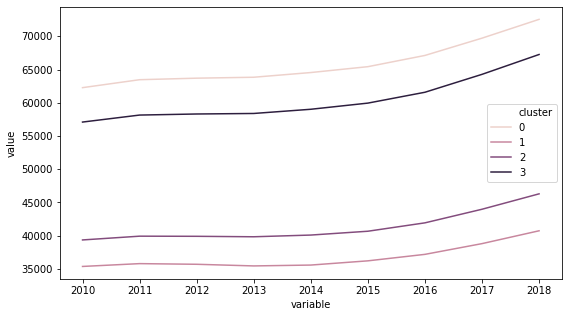

In [28]:
# Use melt to un-pivot the dataframe
melted = pd.melt(median_income_by_year, id_vars =['cluster'], value_vars =['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']) 
fig_dims = (9, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='variable', y='value', hue='cluster', data=melted, ax = ax);

### Analyzing YoY median income growth rate of the clusters

In [0]:
income_growth = pd.DataFrame(columns = ['cluster', '2011', '2012', '2013', '2014', '2015', '2016','2017', '2018'])
for year in median_income_by_year.columns[2:]:
    income_growth[year] = 100*(median_income_by_year[year] - median_income_by_year[str(int(year)-1)])/median_income_by_year[str(int(year)-1)]
income_growth['cluster'] = median_income_by_year['cluster']

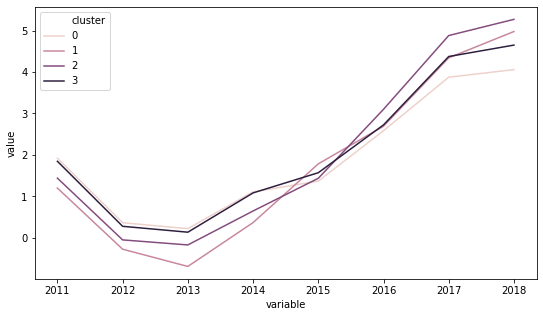

In [49]:
melted = pd.melt(income_growth, id_vars =['cluster'], value_vars =['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']) 
fig_dims = (9, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='variable', y='value', hue='cluster', data=melted, ax = ax);